In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd ..

/Users/rubenbroekx/Documents/Projects/SemiSupervisedClustering


# Demo - Default Usage

**Demo: Explain the package, as well as this demo**

In [3]:
import re
import json
import matplotlib.pyplot as plt
import tensorflow as tf

from glob import glob
from tqdm import tqdm
from pathlib import Path
from collections import Counter

from semi_supervised_clustering import EmbeddingModel

## Data

In [8]:
# Consider only the profiles scraped from LinkedIn
DATA_PATH = Path.cwd() / 'demos/demo_data.json'

# Name assigned to the clustering-model
name = 'demo_default'

In [9]:
def clean_f(x:str) -> str:
    """Cleaning function of the raw text."""
    x = x.lower()
    return re.sub('\W+', ' ', x).strip()

In [10]:
# Load in the data, and clean
with open(DATA_PATH, 'r') as f:
    data = json.load(f)

In [11]:
data_clean = [clean_f(s) for s in data]
print(f"Total of {len(data_clean)} data samples")
data_count = [(k, v) for k, v in sorted(Counter(data_clean).items(), key=lambda x: x[1])]
print(f" --> {len(data_count)} unique")

print(f"\n10 most frequent samples:")
for sample, count in list(reversed(data_count))[:10]:
    print(f" - {sample} ({count})")

Total of 4202 data samples
 --> 899 unique

10 most frequent samples:
 - ku leuven (358)
 - katholieke universiteit leuven (290)
 - universiteit gent (263)
 - hogeschool gent (238)
 - vrije universiteit brussel (127)
 - université catholique de louvain (98)
 - universiteit antwerpen (89)
 - groep t internationale hogeschool leuven (83)
 - hogeschool antwerpen (82)
 - kuleuven (78)


Analyse on frequency:
 - Sample frequency >=  0  --> 100% of all samples (899 samples in total)
 - Sample frequency >= 50  -->  46% of all samples (14 samples in total)
 - Sample frequency >= 100 -->  30% of all samples (5 samples in total)
 - Sample frequency >= 150 -->  27% of all samples (4 samples in total)
 - Sample frequency >= 200 -->  27% of all samples (4 samples in total)
 - Sample frequency >= 250 -->  22% of all samples (3 samples in total)
 - Sample frequency >= 300 -->   9% of all samples (1 samples in total)
 - Sample frequency >= 350 -->   9% of all samples (1 samples in total)


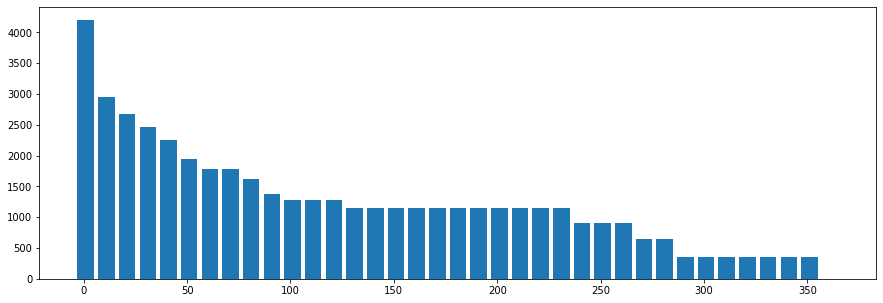

In [12]:
# Plot frequency of the data
counts = sorted([x for k,x in data_count], reverse=True)
x, y = [], []
for i in range(1, max(counts)+10, 10):
    x.append(i)
    y.append(sum(c for c in counts if i <= c))

print(f"Analyse on frequency:")
for freq in range(0,max(counts),50):
    print(f" - Sample frequency >= {freq:^3d} --> {round(100*sum(c for c in counts if freq <= c)/sum(counts)):3d}% of all samples ({len([c for c in counts if freq <= c])} samples in total)")

plt.figure(figsize=(15,5))
plt.bar(x, y, width=8)
plt.show()

## Model

**TODO: Say a word about the model**

### Initialise

In [13]:
model = EmbeddingModel(
    name=name,
    path_model=Path.cwd() / 'demos/models/default_usage',
    path_data=Path.cwd() / 'demos/data/default_usage',
    clean_f=clean_f,
    vocab_size=200,
    model_layers=(50,50,),
)

Creating new model...
Model: "embedder-demo_default-200-50-50-attention-normalised"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              [(None, 200)]        0                                            
__________________________________________________________________________________________________
Dense-0 (Dense)                 (None, 50)           10050       Input[0][0]                      
__________________________________________________________________________________________________
AttentionKey (Dense)            (None, 50)           10050       Input[0][0]                      
__________________________________________________________________________________________________
Dense-output (Dense)            (None, 50)           2550        Dense-0[0][0]                    
_________________________

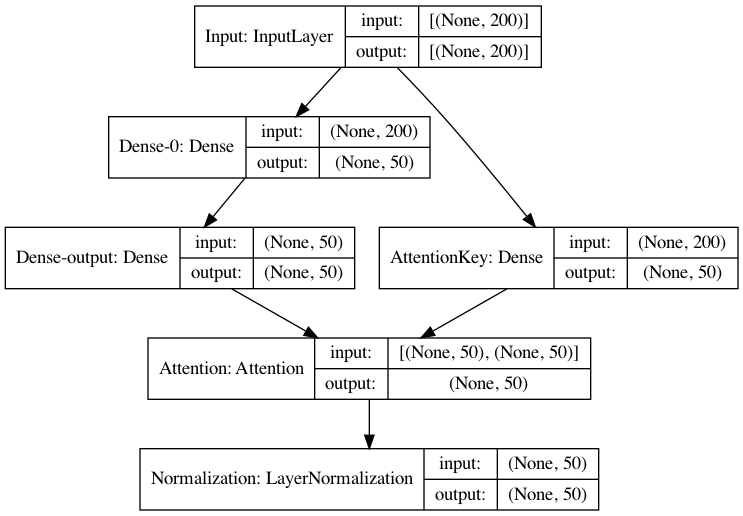

In [15]:
# Plot the model's architecture
tf.keras.utils.plot_model(
        model.embedder._model, Path.cwd() / f"demos/models/default_usage/{model.embedder}.png",
        show_shapes=True,
)

In [16]:
# Create some initial clusters
model.initialise_models(
    data=data_clean,
    reset=True,
)



Analysing encoder 'encoder-demo_default-bpe-200'

Analysing word 'ku leuven':
 --> Encoding: [45, 18]
 --> Word by word:
     - 45: ku
     - 18: leuven

Analysing word 'katholieke universiteit leuven':
 --> Encoding: [58, 32, 18]
 --> Word by word:
     - 58: katholieke
     - 32: universiteit
     - 18: leuven

Analysing word 'universiteit gent':
 --> Encoding: [32, 26]
 --> Word by word:
     - 32: universiteit
     - 26: gent

Analysing word 'hogeschool gent':
 --> Encoding: [34, 26]
 --> Word by word:
     - 34: hogeschool
     - 26: gent

Analysing word 'vrije universiteit brussel':
 --> Encoding: [109, 32, 54]
 --> Word by word:
     - 109: vrije
     - 32: universiteit
     - 54: brussel

Encoding the alphabet:
 - a = [35] = a
 - b = [44] = b
 - c = [60] = c
 - d = [176, 193] = d
 - e = [176, 175] = e
 - f = [127] = f
 - g = [10] = g
 - h = [69] = h
 - i = [68] = i
 - j = [176, 198] = j
 - k = [9] = k
 - l = [7] = l
 - m = [61] = m
 - n = [176, 177] = n
 - o = [90] = o
 - p =

## Training

**TODO: Explain model creation and training**

In [18]:
model.train(
    data=data_clean,
    reset=True,
)



Analysing encoder 'encoder-demo_default-bpe-200'

Analysing word 'ku leuven':
 --> Encoding: [45, 18]
 --> Word by word:
     - 45: ku
     - 18: leuven

Analysing word 'katholieke universiteit leuven':
 --> Encoding: [58, 32, 18]
 --> Word by word:
     - 58: katholieke
     - 32: universiteit
     - 18: leuven

Analysing word 'universiteit gent':
 --> Encoding: [32, 26]
 --> Word by word:
     - 32: universiteit
     - 26: gent

Analysing word 'hogeschool gent':
 --> Encoding: [34, 26]
 --> Word by word:
     - 34: hogeschool
     - 26: gent

Analysing word 'vrije universiteit brussel':
 --> Encoding: [109, 32, 54]
 --> Word by word:
     - 109: vrije
     - 32: universiteit
     - 54: brussel

Encoding the alphabet:
 - a = [35] = a
 - b = [44] = b
 - c = [60] = c
 - d = [176, 193] = d
 - e = [176, 175] = e
 - f = [127] = f
 - g = [10] = g
 - h = [69] = h
 - i = [68] = i
 - j = [176, 198] = j
 - k = [9] = k
 - l = [7] = l
 - m = [61] = m
 - n = [176, 177] = n
 - o = [90] = o
 - p =

Exception: 

In [17]:
import numpy as np

In [32]:
embeddings = model.embedder(model.encoder(data_clean))

In [45]:
similarity = cosine_similarity(embeddings)
similarity.shape

(4202, 4202)

In [46]:
similarity[:,1] = 0

In [47]:
similarity.sort(axis=1)

In [53]:
similarity[0,-10:].sum()

10.0

In [24]:
sdf.argmax(axis=1)

array([2, 0, 2])

In [32]:
sdf.sort(axis=1)
sdf

array([[0.001, 0.002, 0.003],
       [0.004, 0.006, 0.008],
       [0.005, 0.007, 0.009]], dtype=float32)

In [35]:
sdf.argsort()

array([[0, 1, 2],
       [2, 0, 1],
       [1, 0, 2]])

In [34]:
sdf = np.asarray([[1,2,3],[6,8,4],[7,5,9]], dtype=np.float32)
sdf *= 1e-3
sdf

array([[0.001, 0.002, 0.003],
       [0.006, 0.008, 0.004],
       [0.007, 0.005, 0.009]], dtype=float32)

In [54]:
x = dict(zip(['1','2','3'], sdf.tolist()))

In [59]:
print(json.dumps(x, indent=2))

{
  "1": [
    0.0010000000474974513,
    0.0020000000949949026,
    0.003000000026077032
  ],
  "2": [
    0.006000000052154064,
    0.005000000353902578,
    0.004000000189989805
  ],
  "3": [
    0.007000000216066837,
    0.00800000037997961,
    0.009000000543892384
  ]
}


In [56]:
test = json.loads(json.dumps(x))

In [57]:
test

{'1': [0.0010000000474974513, 0.0020000000949949026, 0.003000000026077032],
 '2': [0.006000000052154064, 0.005000000353902578, 0.004000000189989805],
 '3': [0.007000000216066837, 0.00800000037997961, 0.009000000543892384]}

array([[ 3,  6,  9],
       [18, 15, 12],
       [21, 24, 27]])

In [85]:
len(set(data_clean))

899

In [ ]:
model.initialise_models(
    data=data_clean,
)

In [57]:
from math import log

In [61]:
items, weights = zip(*data_count)
weights = [log(w) for w in weights]

In [68]:
similarity = cosine_similarity(model.embedder(model.encoder(items)))
similarity.shape

(899, 899)

In [74]:
model.clusterer.find_clusters(
    n_min_clusters=5,
    items=items,
    embeddings=model.embedder(model.encoder(items)),
    weights=weights,
)


Add to cluster? (sim: 117.606)
 -    Item: 'ku leuven'
 - Cluster: 'None'
Add:a, Garbage:g, Ignore:i, Other:o, Help:h : h
 --> Complete cluster:

 --> Invalid action, try again

Add to cluster? (sim: 117.606)
 -    Item: 'ku leuven'
 - Cluster: 'None'
Add:a, Garbage:g, Ignore:i, Other:o, Help:h : o
 --> Add to other cluster or create new
 --> Current clusters:
 --> Choose existing cluster or create a new one
 --> Cluster ('h <term>' for help) :Katholieke Universiteit Leuven
 --> Sure to create new cluster 'Katholieke Universiteit Leuven'? (Yes:y, No:<other>y
 ----> Create cluster Katholieke Universiteit Leuven

Add to cluster? (sim: 113.39)
 -    Item: 'katholieke universiteit leuven'
 - Cluster: 'None'


KeyboardInterrupt: Interrupted by user

In [75]:
model.clusterer._clusters

{'Katholieke Universiteit Leuven': 'Katholieke Universiteit Leuven',
 'ku leuven': 'Katholieke Universiteit Leuven'}

Loss ???:   0%|          | 0/8 [00:00<?, ?it/s]



Cluster overview:

Validated clusters, total of 87:
 -->  Largest cluster-size: 30
 -->  Average cluster-size: 5.712643678160919
 -->   Median cluster-size: 4
 --> Smallest cluster-size: 1
 -->      #unique clusters: 1

Approximated clusters, total of 1654:
 -->  Largest cluster-size: 236
 -->  Average cluster-size: 1.4165659008464329
 -->   Median cluster-size: 1
 --> Smallest cluster-size: 1
 -->      #unique clusters: 1567
 -->     #garbage clusters: 969



==> Running epoch 1 <==


Loss 0.03761: 100%|██████████| 8/8 [01:26<00:00, 10.84s/it]


Validating:
Approximating clusters...
Generating validations...

Add to cluster? (sim: 0.5329999923706055)
 - Unclustered: 'georgia institute technology'
 -     Cluster: 'Grenoble Alpes University'
 -       Match: 'universite grenoble alpes'
Add:1/a, Garbage:2/g, Ignore:3/i, Other:4/o, Help:5/h : g
 --> Added as garbage

Add to cluster? (sim: 0.9959999918937683)
 - Unclustered: 'ecole catholique arts métiers groep'
 -     Cluster: 'ECAM Group'
 -       Match: 'ecole catholique arts métiers group'
Add:1/a, Garbage:2/g, Ignore:3/i, Other:4/o, Help:5/h : 1
 --> Added to cluster

Add to cluster? (sim: 0.8320000171661377)
 - Unclustered: 'concordia university'
 -     Cluster: 'University of Cambridge'
 -       Match: 'university cambridge'
Add:1/a, Garbage:2/g, Ignore:3/i, Other:4/o, Help:5/h : r
 --> Invalid input 'r', try again

Add to cluster? (sim: 0.8320000171661377)
 - Unclustered: 'concordia university'
 -     Cluster: 'University of Cambridge'
 -       Match: 'university cambridge'


 --> Cluster ('h <term>' for help) :Paris-Saclay Normal School
 ----> Added to cluster 'Paris-Saclay Normal School'

Add to cluster? (sim: 0.722000002861023)
 - Unclustered: 'imd business school'
 -     Cluster: 'Solvay Business School'
 -       Match: 'sbs em'
Add:1/a, Garbage:2/g, Ignore:3/i, Other:4/o, Help:5/h : g
 --> Added as garbage

Add to cluster? (sim: 0.546999990940094)
 - Unclustered: 'lean six sigma'
 -     Cluster: 'Solvay Business School'
 -       Match: 'ecole commerce solvay'
Add:1/a, Garbage:2/g, Ignore:3/i, Other:4/o, Help:5/h : g
 --> Added as garbage

Add to cluster? (sim: 0.7689999938011169)
 - Unclustered: 'hepl haute ecole province liege'
 -     Cluster: 'University of Haute Alsace'
 -       Match: 'university haute alsace'
Add:1/a, Garbage:2/g, Ignore:3/i, Other:4/o, Help:5/h : g
 --> Added as garbage

Add to cluster? (sim: 0.7369999885559082)
 - Unclustered: 'khk kempen'
 -     Cluster: 'Catholic University of Leuven'
 -       Match: 'group technology'
Add:1/a

Loss ???:   0%|          | 0/8 [00:00<?, ?it/s]


Ratio of clustered items: 39.29%
Ratio of clustered non-garbage items: 46.61%
==> Running epoch 2 <==


Loss 0.0211: 100%|██████████| 8/8 [01:26<00:00, 10.80s/it] 


Validating:
Approximating clusters...
Generating validations...

Add to cluster? (sim: 0.7940000295639038)
 - Unclustered: 'isil'
 -     Cluster: 'ISAE Group'
 -       Match: 'isae group'
Add:1/a, Garbage:2/g, Ignore:3/i, Other:4/o, Help:5/h : g
 --> Added as garbage

Add to cluster? (sim: 0.6539999842643738)
 - Unclustered: 'college saint michel'
 -     Cluster: 'University of La Rochelle'
 -       Match: 'universite rochelle'
Add:1/a, Garbage:2/g, Ignore:3/i, Other:4/o, Help:5/h : g
 --> Added as garbage

Add to cluster? (sim: 0.996999979019165)
 - Unclustered: 'arts metiers paristech ecole nationale superieure arts metiers'
 -     Cluster: 'Arts and Crafts Paristech'
 -       Match: 'arts metiers paristech'
Add:1/a, Garbage:2/g, Ignore:3/i, Other:4/o, Help:5/h : 1
 --> Added to cluster

Add to cluster? (sim: 0.8379999995231628)
 - Unclustered: 'university plymouth'
 -     Cluster: 'Emlyon Business School'
 -       Match: 'em lyon'
Add:1/a, Garbage:2/g, Ignore:3/i, Other:4/o, Help:5/

Loss ???:   0%|          | 0/8 [00:00<?, ?it/s]


Ratio of clustered items: 40.82%
Ratio of clustered non-garbage items: 48.43%
==> Running epoch 3 <==


Loss 0.01427: 100%|██████████| 8/8 [01:24<00:00, 10.56s/it]


Validating:
Approximating clusters...
Generating validations...

Add to cluster? (sim: 0.7160000205039978)
 - Unclustered: 'forem'
 -     Cluster: 'University of Evry'
 -       Match: 'universite evry'
Add:1/a, Garbage:2/g, Ignore:3/i, Other:4/o, Help:5/h : g
 --> Added as garbage

Add to cluster? (sim: 0.7200000286102295)
 - Unclustered: 'sup biotech ecole biotechnologies'
 -     Cluster: 'University of Mons'
 -       Match: 'umons'
Add:1/a, Garbage:2/g, Ignore:3/i, Other:4/o, Help:5/h : g
 --> Added as garbage

Add to cluster? (sim: 0.9940000176429749)
 - Unclustered: 'polytech grenoble'
 -     Cluster: 'Grenoble Polytechnic Institute'
 -       Match: 'institut polytechnique grenoble'
Add:1/a, Garbage:2/g, Ignore:3/i, Other:4/o, Help:5/h : 1
 --> Added to cluster

Add to cluster? (sim: 0.8009999990463257)
 - Unclustered: 'cvo mechelen'
 -     Cluster: 'National Conservatory of Arts and Crafts'
 -       Match: 'nationaal conservatorium kunsten ambachten'
Add:1/a, Garbage:2/g, Ignore:3

 --> Cluster ('h <term>' for help) :Grenoble Alpes University
 ----> Added to cluster 'Grenoble Alpes University'

Add to cluster? (sim: 0.847000002861023)
 - Unclustered: 'higher education corporation paris'
 -     Cluster: 'University of Cambridge'
 -       Match: 'university cambridge'
Add:1/a, Garbage:2/g, Ignore:3/i, Other:4/o, Help:5/h : g
 --> Added as garbage

Add to cluster? (sim: 0.6779999732971191)
 - Unclustered: 'microsoft partner network'
 -     Cluster: 'Nancy National School of Mines'
 -       Match: 'ensmn'
Add:1/a, Garbage:2/g, Ignore:3/i, Other:4/o, Help:5/h : g
 --> Added as garbage

Add to cluster? (sim: 0.9430000185966492)
 - Unclustered: 'epitech european institute technology'
 -     Cluster: 'European Business School'
 -       Match: 'ecole commerce europeenne'
Add:1/a, Garbage:2/g, Ignore:3/i, Other:4/o, Help:5/h : 1
 --> Added to cluster

Add to cluster? (sim: 0.6639999747276306)
 - Unclustered: 'heriot watt university'
 -     Cluster: 'Harvard University'
 - 

Loss ???:   0%|          | 0/8 [00:00<?, ?it/s]


Ratio of clustered items: 41.66%
Ratio of clustered non-garbage items: 49.43%
==> Running epoch 4 <==


Loss 0.01193: 100%|██████████| 8/8 [01:25<00:00, 10.65s/it]


Validating:
Approximating clusters...
Generating validations...

Add to cluster? (sim: 0.6150000095367432)
 - Unclustered: 'sint jan berchmanscollege westmalle'
 -     Cluster: 'Grenoble Alpes University'
 -       Match: 'grenoble ecole management'
Add:1/a, Garbage:2/g, Ignore:3/i, Other:4/o, Help:5/h : g
 --> Added as garbage

Add to cluster? (sim: 0.7360000014305115)
 - Unclustered: 'tallinna tehnikaulikool'
 -     Cluster: 'Vlerick Business School'
 -       Match: 'vlerick business school'
Add:1/a, Garbage:2/g, Ignore:3/i, Other:4/o, Help:5/h : g
 --> Added as garbage

Add to cluster? (sim: 0.7210000157356262)
 - Unclustered: 'hoger instituut kempen'
 -     Cluster: 'Emlyon Business School'
 -       Match: 'em lyon'
Add:1/a, Garbage:2/g, Ignore:3/i, Other:4/o, Help:5/h : g
 --> Added as garbage

Add to cluster? (sim: 0.7509999871253967)
 - Unclustered: 'pih kortrijk'
 -     Cluster: 'University of La Rochelle'
 -       Match: 'universiteit rochelle'
Add:1/a, Garbage:2/g, Ignore:3/i,

 --> Cluster ('h <term>' for help) :Catholic University of Leuven
 ----> Added to cluster 'Catholic University of Leuven'

Add to cluster? (sim: 0.9900000095367432)
 - Unclustered: 'groep technology leuven'
 -     Cluster: 'Catholic University of Leuven'
 -       Match: 'katholieke universiteit leuven'
Add:1/a, Garbage:2/g, Ignore:3/i, Other:4/o, Help:5/h : 1
 --> Added to cluster

Add to cluster? (sim: 0.972000002861023)
 - Unclustered: 'universite denis diderot university paris vii'
 -     Cluster: 'Paris Diderot University'
 -       Match: 'diderot paris vii university'
Add:1/a, Garbage:2/g, Ignore:3/i, Other:4/o, Help:5/h : 1
 --> Added to cluster

Add to cluster? (sim: 0.6399999856948853)
 - Unclustered: 'politecnico di torino'
 -     Cluster: 'University of Strasbourg'
 -       Match: 'universiteit straatsburg'
Add:1/a, Garbage:2/g, Ignore:3/i, Other:4/o, Help:5/h : g
 --> Added as garbage


Cluster overview:

Validated clusters, total of 87:
 -->  Largest cluster-size: 30
 -->  

Loss ???:   0%|          | 0/8 [00:00<?, ?it/s]


Ratio of clustered items: 42.14%
Ratio of clustered non-garbage items: 50.0%
==> Running epoch 5 <==


Loss 0.01025: 100%|██████████| 8/8 [01:25<00:00, 10.66s/it]



Ratio of clustered items: 42.21%
Ratio of clustered non-garbage items: 50.08%
INFO:tensorflow:Assets written to: /Users/rubenbroekx/Documents/Projects/HouseOfHR/career-paths-cv-parser/src/career_paths_cv_parser/embeddings/../models/embedder-school-300-100-100-normalised/assets


Cluster overview:

Validated clusters, total of 87:
 -->  Largest cluster-size: 30
 -->  Average cluster-size: 5.977011494252873
 -->   Median cluster-size: 4
 --> Smallest cluster-size: 1
 -->      #unique clusters: 1

Approximated clusters, total of 1392:
 -->  Largest cluster-size: 293
 -->  Average cluster-size: 1.6831896551724137
 -->   Median cluster-size: 1
 --> Smallest cluster-size: 1
 -->      #unique clusters: 1305
 -->     #garbage clusters: 1026





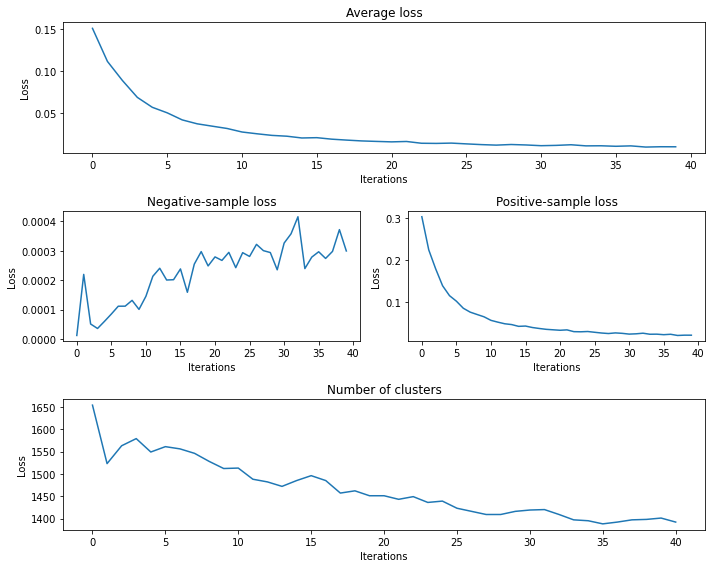

time: 31min 28s (started: 2021-02-25 21:26:46 +01:00)


In [11]:
# Train the embeddings
trainer.train(
    epochs=5,
)

In [ ]:
# TODO: Create plots in script
loss_neg, loss_pos = zip(*loss_split)
plt.figure(figsize=(10, 8))
ax = plt.subplot(3, 1, 1)
plt.plot(loss)
plt.title("Average loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax = plt.subplot(3, 2, 3)
plt.plot(loss_neg)
plt.title("Negative-sample loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax = plt.subplot(3, 2, 4)
plt.plot(loss_pos)
plt.title("Positive-sample loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax = plt.subplot(3, 1, 3)
plt.plot(cluster_count)
plt.title("Number of clusters")
plt.xlabel("Iterations")
plt.ylabel("Loss")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

In [13]:
trainer.visualise_tensorboard()

Run tensorboard in terminal:
tensorboard --logdir /Users/rubenbroekx/Documents/Projects/HouseOfHR/career-paths-cv-parser/src/career_paths_cv_parser/embeddings/../projector

Or run tensorboard in notebook:
%load_ext tensorboard
%tensorboard --logdir /Users/rubenbroekx/Documents/Projects/HouseOfHR/career-paths-cv-parser/src/career_paths_cv_parser/embeddings/../projector
time: 3.72 s (started: 2021-02-25 21:58:39 +01:00)
